----

# TRPLTN PROYECT PYTHON/SQL S.6

***Una vez que recuperamos la informacion necesaria y generamos las tablas con los datos mas importantes, lo siguinete consist en analizar la informacion mediante python para comprobar si el clima o el dia de semana en el que los clinetes se movilicen afecta a los rsultados de cada una de las compañias de taxis, para poder enfatizar una toma de decisiones mas objetiva basada en los datos que pueda generar mejores resultados al tomar accion sobre los mismos.***

**Vamos a realizar un analisis  exhaustivo de los datos recuperados para tener la informacion mas exacta y generar una exelente labor de analisis para que las decisiones tomadas con base a ellos sean las mas idoneas y poder tomar como referencia este tipo de analisis y recuperacion de datos para futuras deciociones respecto a este campo de trabajo, tomaremos en cunta los timepos y el clima como tal para seguir avanzando como profesionales en el camino del analisis adecuado y por supuesto para que la compañia a quien seran entregados los resultados tenga un excelente feedback para el departamento de analitica.**

# 1. Importar las librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Se leen los archivos para mostrar los datos A medinte rutas absolutas

In [2]:
df_cpny = "moved_project_sql_result_01 (3).csv"

df_travels = "moved_project_sql_result_04.csv"

df_weather_tt = "moved_project_sql_result_07.csv"

In [3]:
df_cpny = pd.read_csv ('moved_project_sql_result_01 (3).csv')
df_travels = pd.read_csv ('moved_project_sql_result_04.csv')
df_weather_tt = pd.read_csv ('moved_project_sql_result_07.csv')

In [4]:
df_cpny.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


Observamos la informacion general de los datos

In [5]:
df_cpny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Notamos que los datos son del tipo adecuado de momento, vamos a verificar la descripcion de los mismos y verificar valores nulos y duplicados.

In [6]:
df_cpny.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


Siempre es bueno tener una descripcion general de los datos para asegurarnos de que sus estadisticas descriptivas esten acorde a el objetivo a que queremos llegar con la tabla.

In [7]:
df_cpny.isna().sum()

company_name    0
trips_amount    0
dtype: int64

Al no encontrar valores nulos en nuestra tabla asumimos que tendremos datos limpios con los que podremos llegar a conclusiones mas exactascon este dataframe.

In [8]:
df_cpny.duplicated().reset_index()

,index,0
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
59,59,False
60,60,False
61,61,False
62,62,False


Esto nos indica que no tenemos valores duplicados en nuestra tabla ya que tenemos una columna de False

Para finslizar con el analisis de este dataframe, tambien podriamos reaslizar una ilustracion en un grafico de barras para verificar que empresa ha sido la mas solicitada los dias 15 y 16 de noviembre del año 2017.

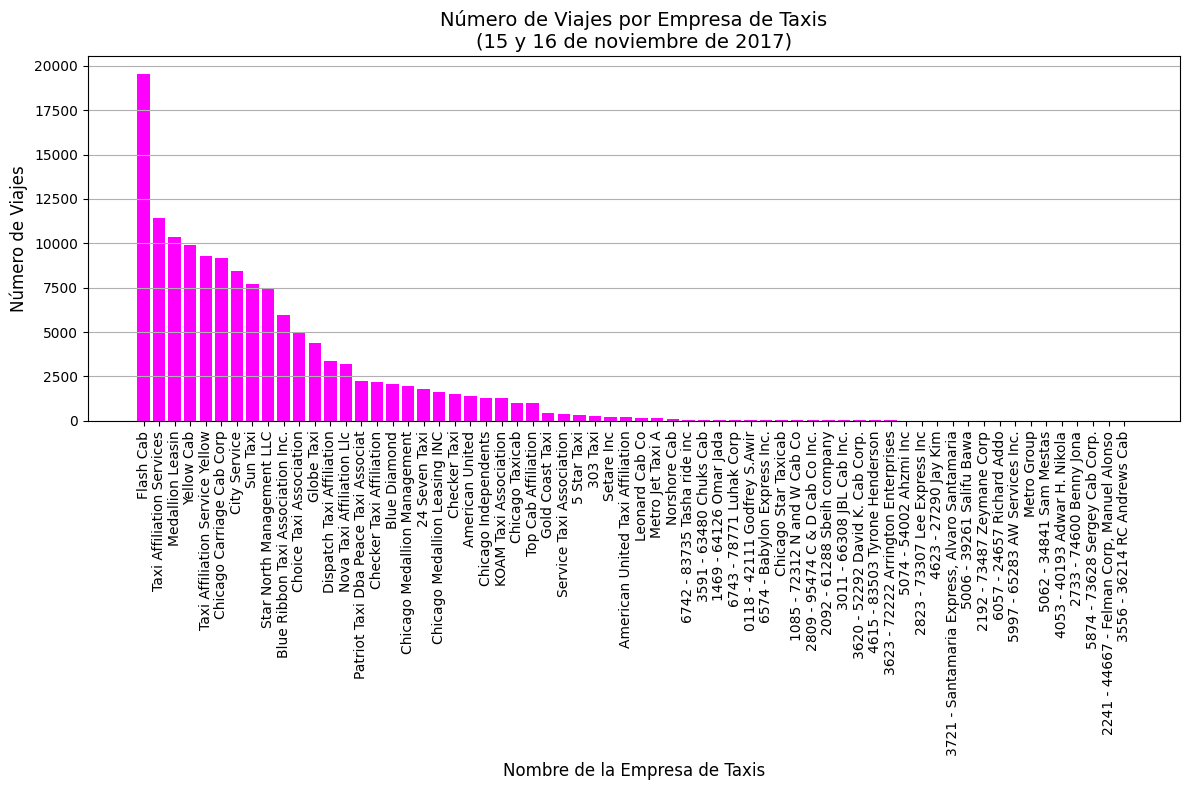

In [9]:
plt.figure(figsize=(12, 8))
df_cpny_sorted = df_cpny.sort_values(by='trips_amount', ascending=False)
plt.bar(df_cpny_sorted['company_name'], df_cpny_sorted['trips_amount'], color='magenta')
plt.xlabel('Nombre de la Empresa de Taxis', fontsize=12)
plt.ylabel('Número de Viajes', fontsize=12)
plt.title('Número de Viajes por Empresa de Taxis\n(15 y 16 de noviembre de 2017)', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Ahora mediante este grafico de barras, notamos que la empresa que mayor numero de viajes ha tenido es la de Flash Cab y tambien notamos que existen empresas que no han generado ningun viaje en estos 2 dias.

**Con este analisis exploratorio podriamos decir que no tenemos problemas co el dataframe df_cpny que contiene el nombre de la compañia de taxis y sus viajes realizados, ahora vamos a hacer un analisis por el tiempo de entrada y de salida de cada uno de los taxis.**

In [10]:
df_travels.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Este es nuestro siguiente Dataframe a analizar que contiene el lugar de finalizacion de viaje y el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

In [11]:
df_travels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


La informacion general, nos indica que nuestro dataframe tiene 93 filas, 2 columnas y que nuestros datos son del tipo correcto hastael momento estos se veran modificados de ser necesario en el futuro.

In [12]:
df_travels.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


Gracias a la descripcion de los datos observamos buenas metricas para los datos en la tabla.

In [13]:
df_travels.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

No tenemos valores ausentes en nustra tabla pero tambien vamos verificar los duplicados. 

In [14]:
df_travels.duplicated().sum()

0

Ahora, al denotar que no existen valores duplicados ni ausentes, podremos identificar los 10 principales barrios en términos de finalización del recorrido.

In [15]:
top_neighborhoods = df_travels.nlargest(10, 'average_trips')
top_neighborhoods.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Mediante esta tabla notamos en promedio cuales son los principlaes barrios en los que se han finalizado los recorridos, y seria mucho mas facil, tambien poder observarlos en un drafico de barras.

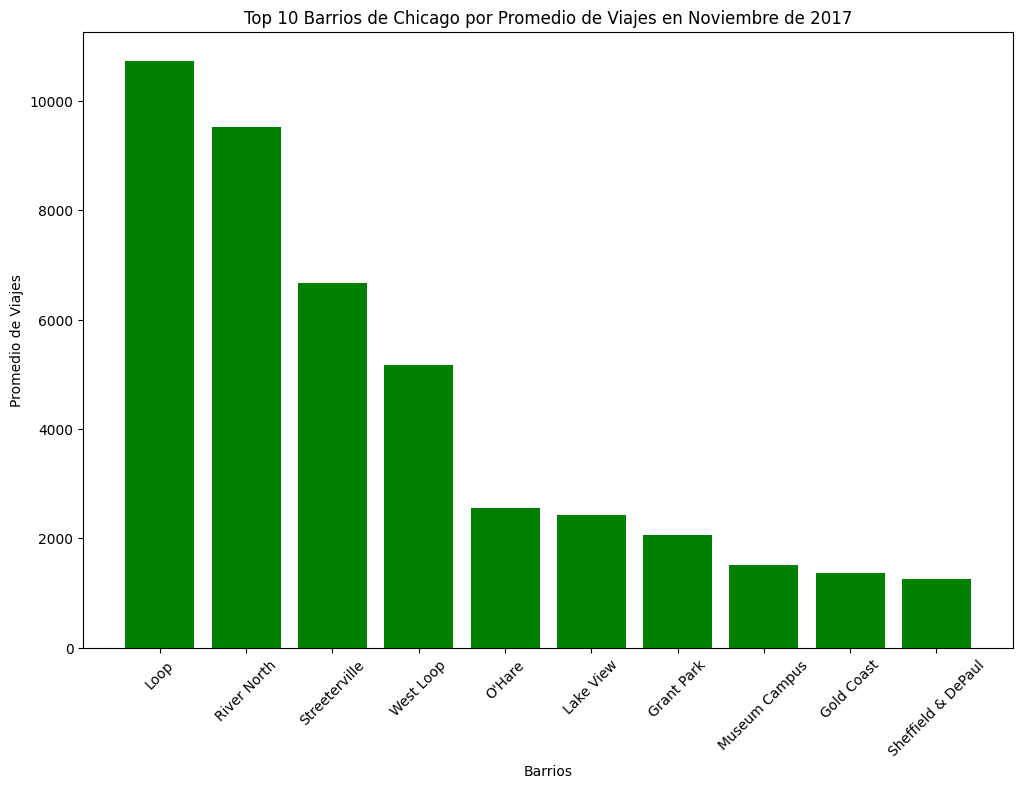

In [16]:
plt.figure(figsize=(12, 8))
plt.bar(top_neighborhoods['dropoff_location_name'], top_neighborhoods['average_trips'], color='green')
plt.title('Top 10 Barrios de Chicago por Promedio de Viajes en Noviembre de 2017')
plt.xlabel('Barrios')
plt.ylabel('Promedio de Viajes')
plt.xticks(rotation=45)
plt.show()

**De esta manera, notamos que en promedio los barrios que tiene mayor finalizaciones de recorridos estan entre Loop y sheffield & DePaul, este diagrama sera de mucha ayuda para relacionarlos con las condiciones climaticas y el lugar y fecha de la recogida.**

Ahora analizaremos el dataframe que contien la fecha de la recoguida, las condiciones climaticas y la duracion en segundos de cada viaje.

In [17]:
df_weather_tt.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Observamos la informacion general de los datos.

In [18]:
df_weather_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


observamos alrededor de 1068 filas pero solo 3 columnas de las cuales 2 son de tipo objeto y una de tipo float64, en este punto puede ser necerasio cambiar algunos tipos de datos

In [19]:
df_weather_tt.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [20]:
df_weather_tt.duplicated().sum()

197

Al denotar  q existen valores duplicados pero no  ausentes, en nustro dataframe, lo siguinete es realizar una descripcion general de los mismos para veficar sus estadisticas mas importantes.

In [21]:
df_weather_tt.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


Siempre es bueno realizar una descripcion degenral de los datos, sobre toso si estos seran tomados en cuenta para realizar una prueba de hipotesis.

Ahora cambiemos los datos al tipo de datos correctos y volveremos a verificar las informacion general para verificar que hayamos efectuado el cambio.

In [22]:
df_weather_tt.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [23]:
df_cpny.columns

Index(['company_name', 'trips_amount'], dtype='object')

In [24]:
df_travels.columns

Index(['dropoff_location_name', 'average_trips'], dtype='object')

In [25]:
df_weather_tt['start_ts'] = pd.to_datetime(df_weather_tt['start_ts'])
df_weather_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


Una vez que nos sersioramos que los datos datos esten en el tipo correcto, lo siguinete es realizar un filtro para diferenciar dias sabdos lluviosos, de los demas dias.

In [26]:
df_weather_tt

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


Debido a que la tabla solo contiene el sabado nuestros filtros seran enfocados unicamente al clima representado como bueno 'Good', o malo 'Bad'

In [27]:
good_weather = df_weather_tt.query('weather_conditions == "Good"')
bad_weather = df_weather_tt.query('weather_conditions == "Bad"')
display(good_weather)
display(bad_weather)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0


,start_ts,weather_conditions,duration_seconds
6,2017-11-04 16:00:00,Bad,2969.0
30,2017-11-18 12:00:00,Bad,1980.0
34,2017-11-04 17:00:00,Bad,2460.0
51,2017-11-04 16:00:00,Bad,2760.0
52,2017-11-18 12:00:00,Bad,2460.0
...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0
1032,2017-11-18 10:00:00,Bad,1908.0
1053,2017-11-18 12:00:00,Bad,2400.0
1061,2017-11-18 16:00:00,Bad,2186.0


De esta separamos los dias sabados en los que hubo buen clima de los dias sabados en los que no ubo un exelemnte clima para seguir evaluando la duracion de los viajes.

In [28]:
good_weather_durations = good_weather['duration_seconds']
bad_weather_durations = bad_weather['duration_seconds']
display(good_weather_durations.reset_index())
display(bad_weather_durations.reset_index())

,index,duration_seconds
0,0,2410.0
1,1,1920.0
2,2,1543.0
3,3,2512.0
4,4,1440.0
...,...,...
883,1062,1500.0
884,1063,0.0
885,1064,1318.0
886,1065,2100.0


,index,duration_seconds
0,6,2969.0
1,30,1980.0
2,34,2460.0
3,51,2760.0
4,52,2460.0
...,...,...
175,1031,2560.0
176,1032,1908.0
177,1053,2400.0
178,1061,2186.0


Y obtenemos la duracion de cada uno de los viajes en las dos condiciones climaticas para los dias sabados. A continuacion vamos a descartar valores atipicos asi como tambien analizar y eliminar posibles outliers de las muestras para asegurar que no afectende manera significativa el test estadístico.

In [29]:
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]
good_weather_durations_clean = remove_outliers(good_weather_durations)
bad_weather_durations_clean = remove_outliers(bad_weather_durations)
display( good_weather_durations_clean.describe().reset_index())
display(bad_weather_durations_clean.describe().reset_index())

,index,duration_seconds
0,count,882.000000
1,mean,1976.816327
2,std,702.422011
3,min,0.000000
4,25%,1385.250000
5,50%,1800.000000
6,75%,2460.000000
7,max,3982.000000


,index,duration_seconds
0,count,177.000000
1,mean,2434.785311
2,std,670.068237
3,min,1182.000000
4,25%,1980.000000
5,50%,2560.000000
6,75%,2926.000000
7,max,4044.000000


Verificamos y tratamos los outliers mediante una descripcion general, utilizando el IQR (Interquartile Range) o el rango intercuartilico para descartar valores atipicos, y precisamente no tenemos significancias importantes en en los extremos, asi que prodederemos a realizar  el test levene para verificar difencias o igualdades de las varianzas.

In [30]:
levene_stat, levene_p = stats.levene(good_weather_durations_clean, bad_weather_durations_clean)

In [31]:
print(f"Estadístico de Levene: {levene_stat:.2f}")
print(f"Valor p: {levene_p:.5f}")
print("Conclusión:", "Las varianzas son iguales." if levene_p > 0.05 else "Las varianzas son diferentes.")

Estadístico de Levene: 0.85
Valor p: 0.35636
Conclusión: Las varianzas son iguales.


**Determinamos de esta manera que las variazas son iguales para los dias que tienen buen clima y para los dias que tienen mal clima, tendremos una idea de como poder generar nuestra hipotesis nula, H0 y nuestra hipotesis alternativa H1.**

**H0 = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual para los dias sábados lluviosos.**

**H1 = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia para los los sábados lluviosos.**

In [32]:
equal_var = levene_p > 0.05
t_statistic, p_value = stats.ttest_ind(good_weather_durations_clean, bad_weather_durations_clean, equal_var=equal_var)

In [33]:
print(f"Estadístico t: {t_statistic:.2f}")
print(f"Valor p: {p_value:.5f}")
print("Conclusión:", "Hay evidencia suficiente para rechazar la hipótesis nula." if p_value < 0.05 else "No hay suficiente evidencia para rechazar la hipótesis nula.")

Estadístico t: -7.98
Valor p: 0.00000
Conclusión: Hay evidencia suficiente para rechazar la hipótesis nula.


***Asi comprovamos que la hipotesis alternativa en la que planteamos que "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos" es correscta, rechazando de esta manera la hipotssis nula, determinamos que las condiciones climaticas efectivamente afecta el comportamiento de los usuarios en los viajes que estos frevuentan.***